<a href="https://colab.research.google.com/github/VishalTyagi09/My-first-Ml-Models/blob/master/Stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
key= "84dc20a5849de8f7da2b39fc5c86fe5ca3fb2a85"

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
df= pdr.get_data_tiingo('AAPL',api_key= key)

In [ ]:
df.to_csv('Data.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-24 00:00:00+00:00,128.110,129.80,127.12,127.21,55280855,118.056363,119.613737,117.144055,117.226992,55280855,0.0,1.0
1,AAPL,2015-06-25 00:00:00+00:00,127.500,129.20,127.50,128.86,31938100,117.494234,119.060823,117.494234,118.747505,31938100,0.0,1.0
2,AAPL,2015-06-26 00:00:00+00:00,126.750,127.99,126.51,127.67,44066841,116.803091,117.945780,116.581926,117.650893,44066841,0.0,1.0
3,AAPL,2015-06-29 00:00:00+00:00,124.530,126.47,124.48,125.46,49161427,114.757309,116.545065,114.711233,115.614326,49161427,0.0,1.0
4,AAPL,2015-06-30 00:00:00+00:00,125.425,126.12,124.86,125.57,44370682,115.582073,116.222531,115.061412,115.715694,44370682,0.0,1.0


In [ ]:
df1= df.reset_index()['close']

In [ ]:
df1

0       128.110
1       127.500
2       126.750
3       124.530
4       125.425
         ...   
1252    342.990
1253    352.080
1254    351.590
1255    351.730
1256    349.720
Name: close, Length: 1257, dtype: float64

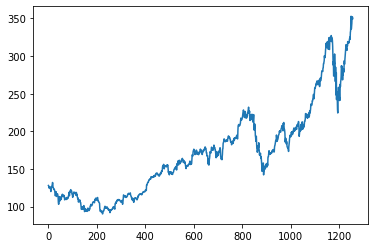

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.14388571]
 [0.1415619 ]
 [0.13870476]
 ...
 [0.9952381 ]
 [0.99577143]
 [0.98811429]]


In [ ]:
training_size= int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data =df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.14388571],
       [0.1415619 ],
       [0.13870476],
       [0.13024762],
       [0.13365714],
       [0.13813333],
       [0.13752381],
       [0.13584762],
       [0.13466667],
       [0.12278095],
       [0.11325714],
       [0.12548571],
       [0.13455238],
       [0.1343619 ],
       [0.13897143],
       [0.14540952],
       [0.1496381 ],
       [0.15897143],
       [0.15394286],
       [0.13287619],
       [0.13264762],
       [0.13013333],
       [0.12354286],
       [0.12586667],
       [0.12438095],
       [0.12201905],
       [0.11794286],
       [0.10704762],
       [0.09257143],
       [0.09546667],
       [0.0944381 ],
       [0.09592381],
       [0.11192381],
       [0.08819048],
       [0.09485714],
       [0.09451429],
       [0.0976    ],
       [0.10217143],
       [0.09965714],
       [0.09398095],
       [0.08499048],
       [0.05874286],
       [0.04868571],
       [0.05104762],
       [0.07371429],
       [0.08601905],
       [0.08742857],
       [0.085

In [ ]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
x_train,y_train =create_dataset(train_data,time_step)
x_test,y_test =create_dataset(test_data,time_step) 

In [ ]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 270ms/step - loss: 0.0034 - val_loss: 0.0064
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 9.1252e-04 - val_loss: 0.0054
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 6.9228e-04 - val_loss: 0.0034
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 5.4638e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 5.1841e-04 - val_loss: 0.0036
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 5.1267e-04 - val_loss: 0.0034
Epoch 7/100
12/12 [==============================] - 2s 192ms/step - loss: 5.0146e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 4.9457e-04 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 4.8924e-04 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 2s 18

In [ ]:
import tensorflow as tf

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

147.20456635489893

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

252.84792184887775

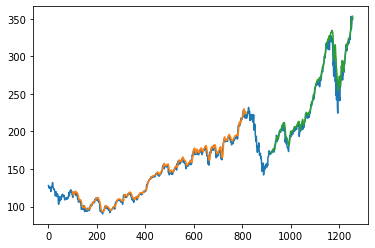

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8914285714285712,
 0.8896380952380951,
 0.8349333333333333,
 0.8316952380952383,
 0.8705142857142858,
 0.8804190476190474,
 0.8947428571428571,
 0.8750095238095237,
 0.8808,
 0.8734095238095239,
 0.9023238095238095,
 0.893447619047619,
 0.8937523809523809,
 0.8710857142857142,
 0.8886857142857143,
 0.8760380952380953,
 0.8484190476190476,
 0.7917714285714286,
 0.753295238095238,
 0.7707047619047618,
 0.6978285714285712,
 0.6972190476190476,
 0.7941714285714285,
 0.7580190476190476,
 0.8091428571428572,
 0.7717333333333334,
 0.7569142857142857,
 0.6698285714285714,
 0.7428571428571427,
 0.7051047619047619,
 0.6014857142857142,
 0.7147809523809525,
 0.5785523809523809,
 0.6191238095238095,
 0.595542857142857,
 0.5883428571428571,
 0.5291428571428571,
 0.5105904761904762,
 0.5963428571428571,
 0.5911619047619048,
 0.6403809523809524,
 0.5996190476190476,
 0.626552380952381,
 0.6245714285714286,
 0.5736,
 0.5889142857142857,
 0.5755047619047619,
 0.6557333333333334,
 0.6441523809523809,

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0144389]
101
1 day input [0.8896381  0.83493333 0.83169524 0.87051429 0.88041905 0.89474286
 0.87500952 0.8808     0.87340952 0.90232381 0.89344762 0.89375238
 0.87108571 0.88868571 0.8760381  0.84841905 0.79177143 0.75329524
 0.77070476 0.69782857 0.69721905 0.79417143 0.75801905 0.80914286
 0.77173333 0.75691429 0.66982857 0.74285714 0.70510476 0.60148571
 0.71478095 0.57855238 0.61912381 0.59554286 0.58834286 0.52914286
 0.51059048 0.59634286 0.5911619  0.64038095 0.59961905 0.62655238
 0.62457143 0.5736     0.58891429 0.57550476 0.65573333 0.64415238
 0.66944762 0.6767619  0.6968     0.74937143 0.73939048 0.748
 0.73318095 0.71081905 0.67820952 0.70765714 0.70358095 0.73382857
 0.73459048 0.71710476 0.7519619  0.77508571 0.75706667 0.77264762
 0.78940952 0.80110476 0.81295238 0.83729524 0.85588571 0.84217143
 0.82784762 0.83504762 0.82807619 0.85569524 0.8487619  0.8719619
 0.86289524 0.87066667 0.8624381  0.86769524 0.86822857 0.86704762
 0.88194286 0.88761905 0.8944     0.8837

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

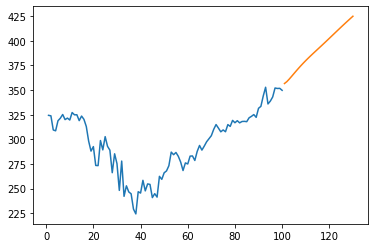

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

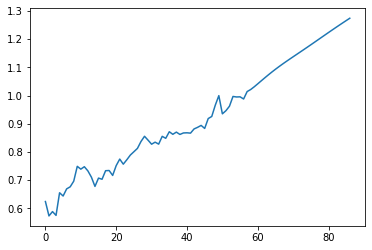

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


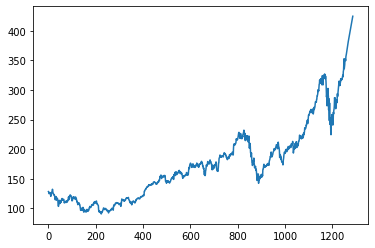

In [ ]:
plt.plot(df3)
